In [1]:
import librosa as librosa
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
%matplotlib inline
import librosa.display
from IPython.display import Audio
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import splitfolders
import skimage.io

c:\Users\anike\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


sr tells us how do we want to discretize the analog signal. sr =32000 means we will get ( after we load the y vector ) 32000 samples per second 

The sampled audio is returned as a numpy array (time series) and has  (190182,)  number of samples
The 10 randomly picked consequitive samples of the audio are:  [0.07905269 0.07768985 0.07616699 0.07447155 0.0725293  0.07043497
 0.0681802  0.06573384 0.063104   0.06037652]


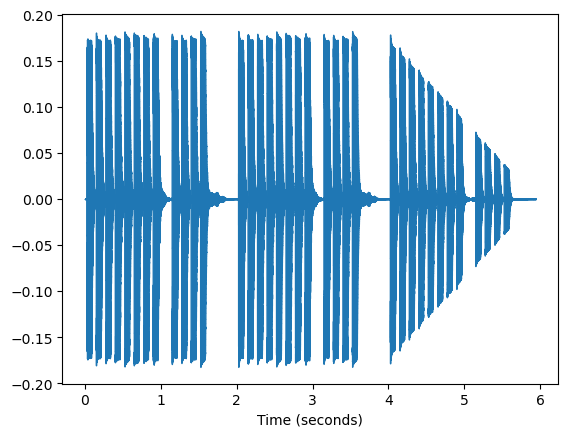

In [3]:
y, sr = librosa.load('test_audio.wav', sr=32000)
librosa.display.waveshow(y, sr= sr, axis='s')
print("The sampled audio is returned as a numpy array (time series) and has ", y.shape, " number of samples")
print("The 10 randomly picked consequitive samples of the audio are: ", y[3000:3010])

In [4]:
n_fft=1024

# Step or stride between windows. If the step is smaller than the window length, the windows will overlap
hop_length=320

#window type for FFT/STFT
window_type ='hann'

# Calculate the spectrogram as the square of the complex magnitude of the STFT
spectrogram_librosa = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length, win_length=n_fft, window=window_type)) ** 2

print("shape of spectrogram_librosa is: ", spectrogram_librosa.shape)
print("size of the spectrogram is ([(frame_size/2) + 1 x number of frames])")
print("frame size that we have specified is the number of samples to consider for the STFT. In our case, it is equal to the n_fft",n_fft, " samples")
print("number of frames depends on the total length of the sampled signal, the number of samples in each frame and the hop length.")

shape of spectrogram_librosa is:  (513, 595)
size of the spectrogram is ([(frame_size/2) + 1 x number of frames])
frame size that we have specified is the number of samples to consider for the STFT. In our case, it is equal to the n_fft 1024  samples
number of frames depends on the total length of the sampled signal, the number of samples in each frame and the hop length.


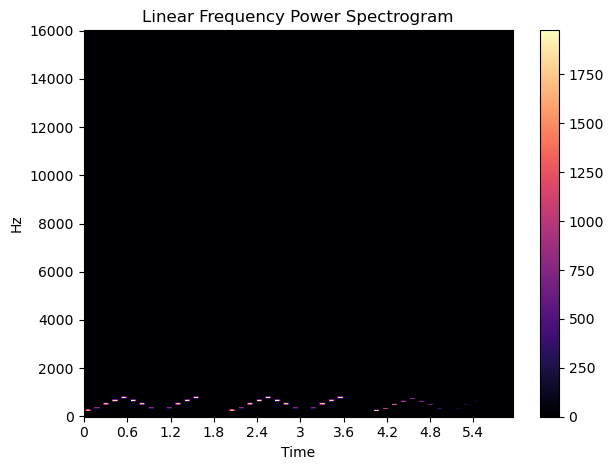

In [5]:
librosa.display.specshow(spectrogram_librosa, sr=sr, x_axis='time', y_axis='linear',hop_length=hop_length)
plt.title('Linear Frequency Power Spectrogram')
plt.colorbar()
plt.tight_layout()
plt.show()

The shape of mel spectrogram is:  (64, 595)


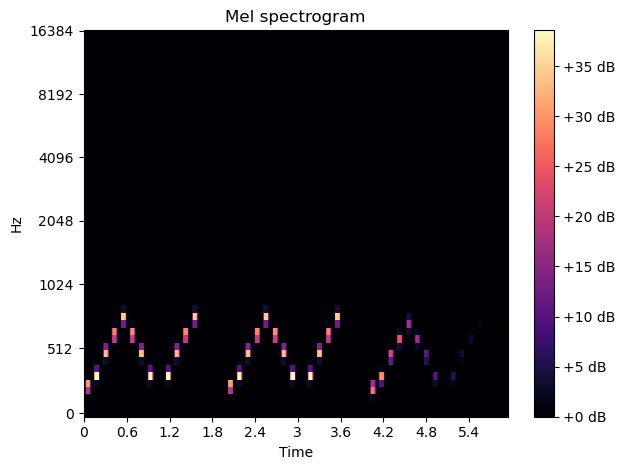

In [6]:
mel_bins = 64 # Number of mel bands
fmin = 0
fmax= None
Mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, win_length=n_fft, window=window_type, n_mels = mel_bins, power=2.0)
print("The shape of mel spectrogram is: ", Mel_spectrogram.shape)

librosa.display.specshow(Mel_spectrogram, sr=sr, x_axis='time', y_axis='mel',hop_length=hop_length)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()

The shape of Log Mel spectrogram is:  (64, 595)


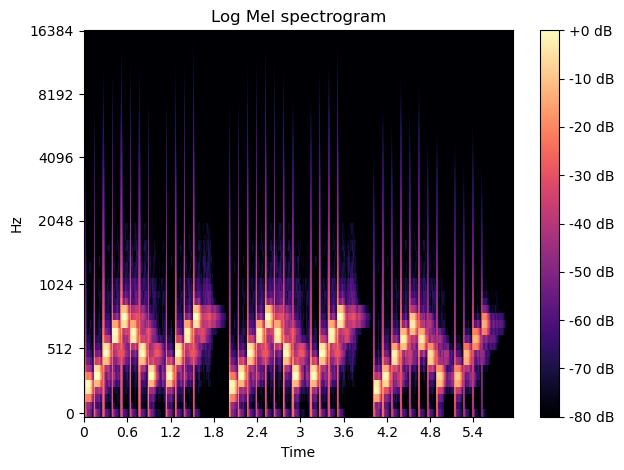

In [7]:
mel_spectrogram_db = librosa.power_to_db(Mel_spectrogram, ref=np.max)
print("The shape of Log Mel spectrogram is: ", mel_spectrogram_db.shape)
librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel',hop_length=hop_length)
plt.colorbar(format='%+2.0f dB')
plt.title('Log Mel spectrogram')
plt.tight_layout()
plt.show()